In [1]:
from math import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

matplotlib.rcParams['axes.labelsize'] = 15

variables = [r"$\dot R$ [m/s]", r"$R$ [m]", r"$Temp$ [K]"]

def plotsol(t,y):
    fig, ax = plt.subplots(len(y)+1, 1, sharex= True, figsize = (8,5), dpi = 120, tight_layout = True)

    for i in range(len(y)):
        ax[i].plot(t, y[i])
        ax[i].set_ylabel(variables[i])
    ax[-1].set_xlabel("$t$ [s]")

    ax[-1].plot(t, ps(t,A,w,d))

    # ax[1].set_ylim(bottom = 0)
    #ax[0].set(xlim = (t[0], t[-1]))
    

In [2]:
patm        = 98000     # Pascals
T_amb       = 293       # Kelvin
# nR          = 800e-8   # n (moles) * R (cte gases)
N           = 6e15      # Num Particulas
kb          = 1.38e-23  # J/K

rho_agua    = 1000      # kg/m^3
viscosidad  = 0.001      # Pa*s == kg/s
s_sup       = 7e-2  # N/m

def ps(t, A, w, d = 0):
    return A * np.sin(t*w + d)   

In [8]:
A  = 0# 2*patm
w  = 2*np.pi * 1000
d  = np.pi/2

def fun(t,y):
    vel, radi, temp = y
    vDot = (
                - 3/2 * np.power(vel,2)
                + (
                    3/4 * N*kb*temp/(np.pi*np.power(radi,3))
                    - (2*s_sup+4*viscosidad*vel)/radi
                    - patm
                    - ps(t, A, w, d)
                )/rho_agua
            )/radi
    rDot = vel
    tDot = - 2 * temp * vel/radi

    return vDot,rDot,tDot  

The solver successfully reached the end of the integration interval.


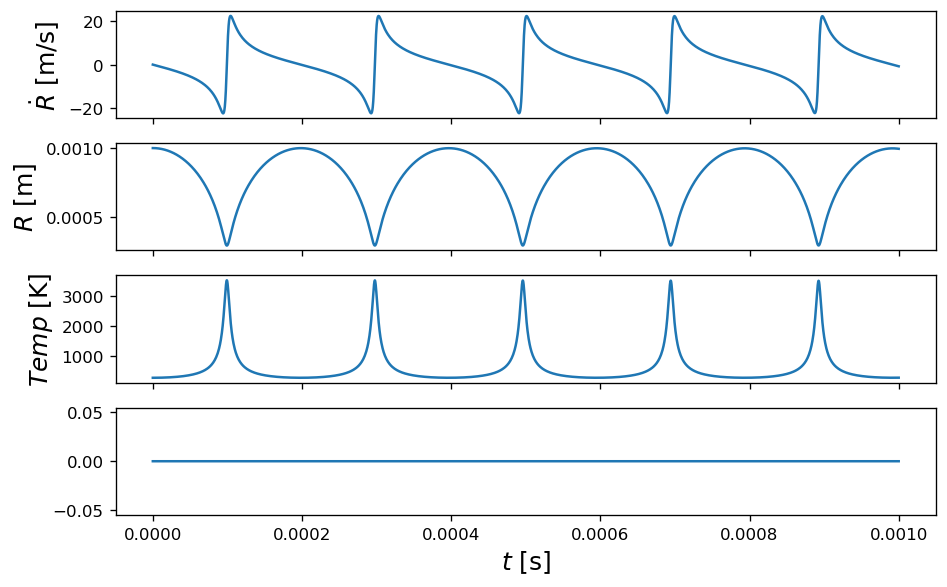

In [9]:
y0 = [0, 1e-3, T_amb] # m/s , m, Kelvin
sol = solve_ivp(fun, (0., .001), y0, max_step = 1e-6, rtol = 1e-12)
print(sol.message)
plotsol(sol.t,sol.y)